In [1]:
import pandas as pd
import numpy as np
import io

In [2]:
data = pd.read_csv('placement.csv',names=['CGPA', 'IQ', 'Placement'])

In [3]:

df = pd.DataFrame(data)

In [4]:
df

,CGPA,IQ,Placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [5]:
df.shape

(100, 3)

In [6]:
df.isnull().sum()

CGPA         0
IQ           0
Placement    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CGPA       100 non-null    float64
 1   IQ         100 non-null    float64
 2   Placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


In [8]:
import matplotlib.pyplot as plt

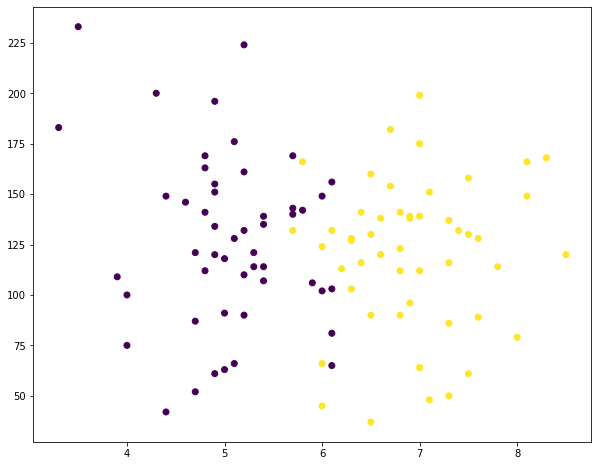

In [9]:
fig, ax = plt.subplots(figsize =(10,8))
ax.scatter(df['CGPA'],df['IQ'], c = df['Placement'])

In [10]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [11]:
X

,CGPA,IQ
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: Placement, Length: 100, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.13)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
x_train = scaler.fit_transform(x_train)

In [18]:
x_test = scaler.transform(x_test)

In [19]:
x_test

array([[ 0.53202356,  0.40996046],
       [-0.6702115 ,  1.00311365],
       [ 0.78964536,  0.40996046],
       [ 0.44614963, -2.19475575],
       [ 1.21901503,  0.25522484],
       [-2.13006836,  2.85994105],
       [-0.1549679 ,  1.13206   ],
       [ 0.27440176,  0.15206776],
       [ 0.27440176, -0.49266397],
       [ 0.01677996, -0.51845324],
       [ 0.78964536, -0.67318886],
       [-0.24084184,  1.20942781],
       [-0.24084184,  0.25522484]])

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
clf = LogisticRegression()

In [22]:
clf.fit(x_train,y_train)

LogisticRegression()

In [23]:
clf.score(x_test,y_test)

0.8461538461538461

In [24]:
print(clf.predict(x_test))
print(y_test)

[1 0 1 1 1 0 0 1 1 0 1 0 0]
48    1
47    0
11    1
82    1
3     1
50    0
85    1
63    1
98    1
62    0
66    1
84    0
87    1
Name: Placement, dtype: int64


In [25]:
from sklearn.metrics import accuracy_score

In [26]:
pip install mlxtend

In [28]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

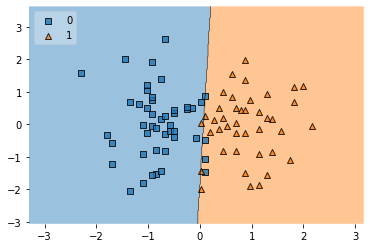

In [31]:
plot_decision_regions(x_train,y_train.values,clf = clf , legend = 2)

In [32]:
import pickle

In [33]:
pickle.dump(clf,open('model.pkl','wb'))